In [1]:
import flowermd
import hoomd
from flowermd.library import PolyEthylene, OPLS_AA
from flowermd import Pack
from flowermd.base import Simulation
from cmeutils.visualize import FresnelGSD
import gsd
import matplotlib.pyplot as plt
import numpy as np
from flowermd.utils import get_target_box_mass_density
import freud
import matplotlib.pyplot as plt

/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/mdtraj/formats/__init__.py:13: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from mdtraj.formats.trr import TRRTrajectoryFile


In [4]:
traj = gsd.hoomd.open('given-pps-cg.gsd')

In [5]:
def nop(frame):
    positions = frame.particles.position
    molecule_ids = frame.bonds.group
    temp = positions[0]
    vectors = []
    for i, pos in enumerate(positions):
            if i < len(molecule_ids):
                vectors.append(np.stack(pos) - np.stack(temp))
                temp = pos
    vectors = np.array(vectors[1:])
    return vectors

In [6]:
nematic = freud.order.Nematic()
import time
start = time.process_time()
orders = []
frames = []
count = 0
for frame in traj:
    count += 1
    frames.append(count)
    nematic.compute(nop(frame))
    orders.append(nematic.order)
    print("Nematic Order Parameter:", nematic.order)
print("Time taken:", time.process_time() - start, "s")

Nematic Order Parameter: 0.08366383612155914
Nematic Order Parameter: 0.08125424385070801
Nematic Order Parameter: 0.0834449902176857
Nematic Order Parameter: 0.07996775209903717
Nematic Order Parameter: 0.07861025631427765
Nematic Order Parameter: 0.07698452472686768
Nematic Order Parameter: 0.07232202589511871
Nematic Order Parameter: 0.07394229620695114
Nematic Order Parameter: 0.07208936661481857
Nematic Order Parameter: 0.06853336095809937
Nematic Order Parameter: 0.06938223540782928
Nematic Order Parameter: 0.06591778248548508
Nematic Order Parameter: 0.061639755964279175
Nematic Order Parameter: 0.06113795191049576
Nematic Order Parameter: 0.06189384683966637
Nematic Order Parameter: 0.05890277773141861
Nematic Order Parameter: 0.05628735572099686
Nematic Order Parameter: 0.05582909658551216
Nematic Order Parameter: 0.057618219405412674
Nematic Order Parameter: 0.057933591306209564
Nematic Order Parameter: 0.06021535396575928
Nematic Order Parameter: 0.05508735403418541
Nematic 

/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Text(0, 0.5, 'S2 parameter')

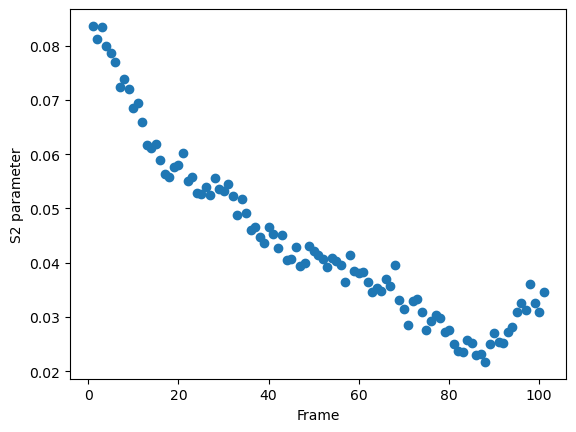

In [7]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")

In [11]:
orders = []
frames = []
for frame in traj:
    count += 1
    frames.append(count)
    positions = frame.particles.position
    nematic.compute(positions)
    orders.append(nematic.order)
    

Text(0, 0.5, 'S2 parameter')

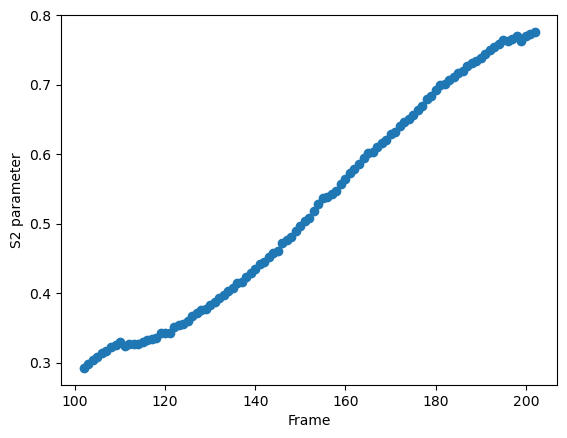

In [12]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")